In [53]:
import numpy as np
import random
import torch
from matplotlib import pyplot as plt
from tqdm import tqdm

In [43]:
def plotter(data, label=['train']):
    """ Plots data. """
    
    for d,l in zip(data, label):
        x, y = d
        plt.scatter(x, y, label=l)
    
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
    plt.show()
    
def fcn(x, degree, coeffs):
    """
    Given x, solves for y given x and coefficients
    
    Input/s:
        x         : ndarray of input data
        degree    : degree of the best fitting polynomial
        coeffs    : polynomial coefficients
        
    Output/s:
        y         : output after evaluating function
    """
    
    assert(len(coeffs) == 3)
    
    
    y = coeffs[0] + coeffs[1]*x + coeffs[2]*x**2
    return y

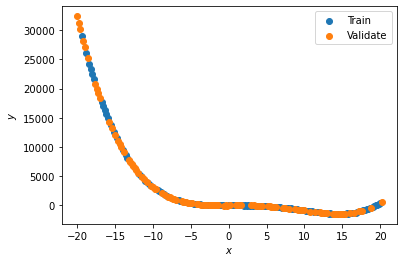

[[ 1.40000000e+00 -1.41878564e+01]
 [ 1.64000000e+01 -1.30878600e+03]
 [-1.88000000e+01  2.61579396e+04]
 [ 1.02000000e+01 -9.17152039e+02]
 [ 9.80000000e+00 -8.13468814e+02]
 [-1.84000000e+01  2.42760902e+04]
 [-1.48000000e+01  1.15227169e+04]
 [ 8.20000000e+00 -5.29743506e+02]
 [ 4.80000000e+00 -9.21845203e+01]
 [ 8.00000000e-01 -5.00110955e+00]
 [ 8.60000000e+00 -6.73135641e+02]
 [ 1.82000000e+01 -7.12389819e+02]
 [-1.06000000e+01  3.78968284e+03]
 [ 6.60000000e+00 -3.25783510e+02]
 [ 1.10000000e+01 -1.03857991e+03]
 [ 9.40000000e+00 -7.50285855e+02]
 [-1.04000000e+01  3.48184242e+03]
 [-1.36000000e+01  8.61983626e+03]
 [-1.78000000e+01  2.16423053e+04]
 [-1.66000000e+01  1.69997958e+04]
 [-8.20000000e+00  1.63158728e+03]
 [ 1.06000000e+01 -9.47436378e+02]
 [ 1.78000000e+01 -8.93920101e+02]
 [ 1.12000000e+01 -1.12072809e+03]
 [ 2.00000000e+00 -5.37308247e+01]
 [-1.20000000e+00  2.64038554e+01]
 [-8.00000000e-01  5.15722058e+01]
 [ 9.00000000e+00 -6.80925805e+02]
 [-9.00000000e+00  2

In [64]:
valtrain = open("data_train.csv", "r").read().splitlines()
del valtrain[0]
random.shuffle(valtrain)

val_half_len = int(len(valtrain)/2)

val_train, val_validate = valtrain[:val_half_len], valtrain[val_half_len:]

xtrain, ytrain=[],[]
for x in val_train:
    vals_train = x.split(",")
    xtrain.append(float(vals_train[0]))
    ytrain.append(float(vals_train[1]))

xvalidate, yvalidate=[],[]
for x in val_validate:
    vals_validate = x.split(",")
    xvalidate.append(float(vals_validate[0]))
    yvalidate.append(float(vals_validate[1]))
    
plotter([[xtrain, ytrain],[xvalidate, yvalidate]], label=['Train', 'Validate'])

x, y = np.array(xtrain, dtype="float64"), np.array(ytrain, dtype="float64")
n_obs = x.shape[0]
if n_obs != y.shape[0]:
    raise ValueError("'x' and 'y' lengths do not match")
xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

print(xy)

['x,y', '-100,12009902', '-95,9868744.5', '-90,8027012', '-85,6455454.5', '-80,5126322', '-75,4013364.5', '-70,3091832', '-65,2338474.5', '-60,1731542', '-55,1250784.5', '-50,877452', '-45,594294.5', '-40,385562', '-35,237004.5', '-30,135872', '-25,70914.5', '-20,32382', '-15,12024.5', '-10,3092', '-5,334.5', '0,2', '5,-155.5', '10,-888', '15,-1445.5', '20,422', '25,8464.5', '30,27932', '35,65574.5', '40,129642', '45,229884.5', '50,377552', '55,585394.5', '60,867662', '65,1240104.5', '70,1719972', '75,2326014.5', '80,3078482', '85,3999124.5', '90,5111192', '95,6439434.5', '100,8010102']


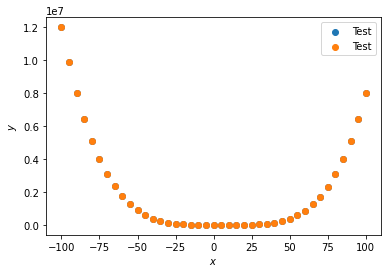

In [52]:
valtest = open("data_test.csv", "r").read().splitlines()

xtest=[]
ytest=[]
for x in valtest[1:]:
    vals_test = x.split(",")
    xtest.append(float(vals_test[0]))
    ytest.append(float(vals_test[1]))
    
plotter([[xtest,ytest],[xtest,ytest]], label=['Test','Test'])

In [49]:
def calc_loss(y_pred, y_gt):
    """
    Calculate the MSE loss
    
    Input/s:
        y_pred : predicted y of model
        y_gt   : ground truth y
    """
    mse = ((y_pred-y_gt)**2).mean()
    return mse

def calc_gradient(params, x, y_gt):
    """
    Calculates the gradient.
    
    Input/s:
        params : coefficients initialized randomly
        x      : ndarray of input data
        y_gt   : ground truth y
    
    """
    y_pred = fcn(x, params, add_noise=False)
    y_diff = y_pred - y_gt
    
    dL_c0 = (2*y_diff).mean()
    dL_c1 = (2*x*y_diff).mean()
    dL_c2 = (2*x**2*y_diff).mean()
    
    dL_cs = np.array([dL_c0, dL_c1, dL_c2])
    return dL_cs

def update_params(params, grads, lr=0.001):
    """
    Updates our parameters.
    
    Input/s:
        params : coefficients initialized randomly
        grads  : ndarray of gradients
        lr     : learning rate
    """
    new_params = params - lr*grads
    return new_params

In [57]:
lr = 0.0001
batch_size = 4
max_epoch = 5000

In [ ]:
def SGD(lr, batch_size, x, y):
    